## Kaggle: IBM Attrition
Uncover the factors that lead to employee attrition and explore important questions such as:
1. Show a breakdown of distance from home by job role and attrition.
2. Compare average monthly income by education and attrition.


In [1]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the required packages


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
#Filtering the unrequired columns from the dataset
df = df.filter(['Attrition', 'DistanceFromHome','JobRole','Education','MonthlyIncome'])
df

,Attrition,DistanceFromHome,JobRole,Education,MonthlyIncome
0,Yes,1,Sales Executive,2,5993
1,No,8,Research Scientist,1,5130
2,Yes,2,Laboratory Technician,2,2090
3,No,3,Research Scientist,4,2909
4,No,2,Laboratory Technician,1,3468
...,...,...,...,...,...
1465,No,23,Laboratory Technician,2,2571
1466,No,6,Healthcare Representative,1,9991
1467,No,4,Manufacturing Director,3,6142
1468,No,2,Sales Executive,3,5390


# Inspecting the data

In [4]:
df.isnull().sum()

Attrition           0
DistanceFromHome    0
JobRole             0
Education           0
MonthlyIncome       0
dtype: int64

In [5]:

df.columns

Index(['Attrition', 'DistanceFromHome', 'JobRole', 'Education',
       'MonthlyIncome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Attrition         1470 non-null   object
 1   DistanceFromHome  1470 non-null   int64 
 2   JobRole           1470 non-null   object
 3   Education         1470 non-null   int64 
 4   MonthlyIncome     1470 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 57.5+ KB


In [7]:
df.dtypes

Attrition           object
DistanceFromHome     int64
JobRole             object
Education            int64
MonthlyIncome        int64
dtype: object

In [8]:
#Describing the data 
df.describe()

,DistanceFromHome,Education,MonthlyIncome
count,1470.000000,1470.000000,1470.000000
mean,9.192517,2.912925,6502.931293
std,8.106864,1.024165,4707.956783
min,1.000000,1.000000,1009.000000
25%,2.000000,2.000000,2911.000000
50%,7.000000,3.000000,4919.000000
75%,14.000000,4.000000,8379.000000
max,29.000000,5.000000,19999.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Attrition         1470 non-null   object
 1   DistanceFromHome  1470 non-null   int64 
 2   JobRole           1470 non-null   object
 3   Education         1470 non-null   int64 
 4   MonthlyIncome     1470 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 57.5+ KB


In [10]:
#Visualizing the required columns

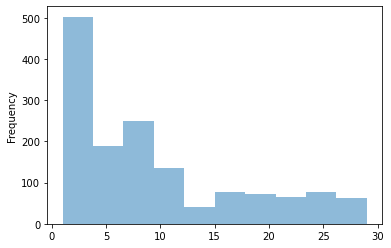

In [11]:
#Visualizing distance from home
df["DistanceFromHome"]

df["DistanceFromHome"].plot.hist(alpha=0.5);


In [12]:
df["DistanceFromHome"].value_counts()


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

In [13]:
#Visualizing attrition
#df.Attrition = df.Attrition.astype('str')
df.Attrition.replace(["Yes","No"],[1,0],inplace=True)
#df.Attrition
df

,Attrition,DistanceFromHome,JobRole,Education,MonthlyIncome
0,1,1,Sales Executive,2,5993
1,0,8,Research Scientist,1,5130
2,1,2,Laboratory Technician,2,2090
3,0,3,Research Scientist,4,2909
4,0,2,Laboratory Technician,1,3468
...,...,...,...,...,...
1465,0,23,Laboratory Technician,2,2571
1466,0,6,Healthcare Representative,1,9991
1467,0,4,Manufacturing Director,3,6142
1468,0,2,Sales Executive,3,5390


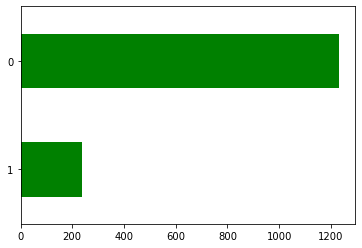

In [14]:
df["Attrition"].value_counts().sort_values().plot(kind = 'barh', color= "green")

In [15]:
df["Attrition"].value_counts()


0    1233
1     237
Name: Attrition, dtype: int64

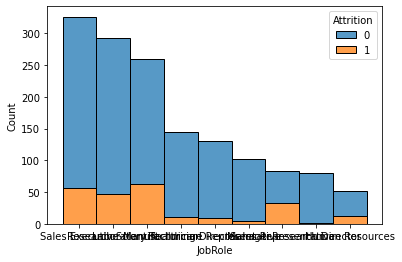

In [16]:
sns.histplot(df, x="JobRole", hue="Attrition", multiple="stack")

In [17]:
df['JobRole'].head()

0          Sales Executive
1       Research Scientist
2    Laboratory Technician
3       Research Scientist
4    Laboratory Technician
Name: JobRole, dtype: object

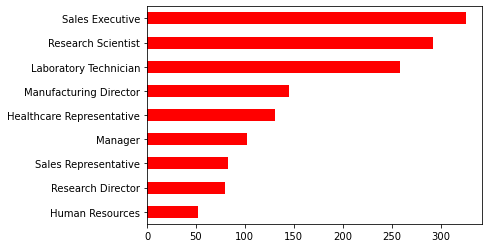

In [18]:
##Visualizing Jobrole
#df["JobRole"].

df["JobRole"].value_counts().sort_values().plot(kind = 'barh',color= "red")

In [19]:
df["JobRole"].value_counts()


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

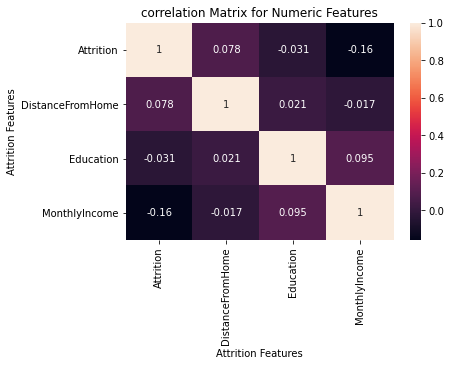

In [20]:
correlation_matrix= df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('correlation Matrix for Numeric Features')

plt.xlabel('Attrition Features')
plt.ylabel('Attrition Features')

plt.show()

In [21]:
# Combine levels in a categorical variable by seeing their distribution
JobRoleCrossTab = pd.crosstab(df['JobRole'], df['Attrition'], margins=True)
JobRoleCrossTab

Attrition,0,1,All
JobRole,,,
Healthcare Representative,122,9,131
Human Resources,40,12,52
Laboratory Technician,197,62,259
Manager,97,5,102
Manufacturing Director,135,10,145
Research Director,78,2,80
Research Scientist,245,47,292
Sales Executive,269,57,326
Sales Representative,50,33,83


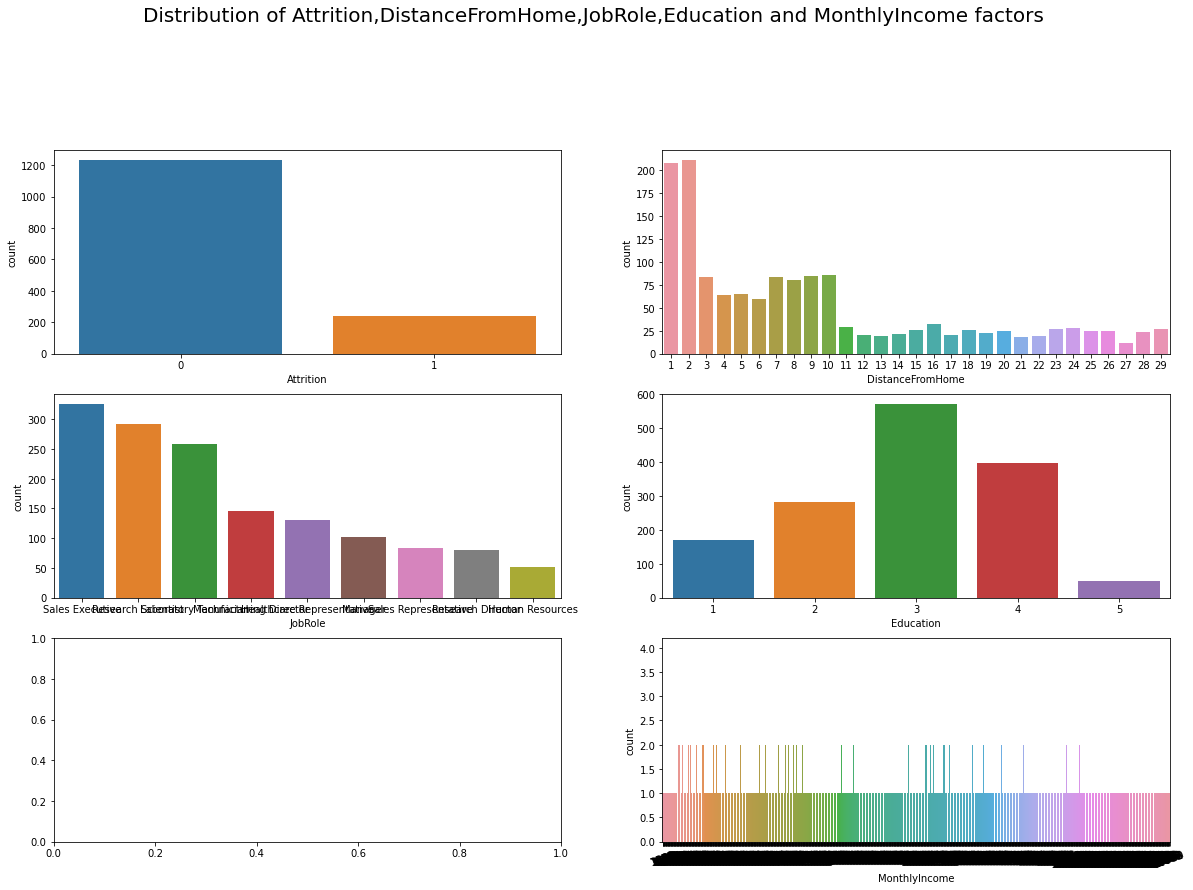

In [24]:
# Plotting countplots for the categorical variables
fig,ax = plt.subplots(3,2, figsize=(20,20))            
plt.suptitle("Distribution of Attrition,DistanceFromHome,JobRole,Education and MonthlyIncome factors", fontsize=20)
sns.countplot(df['Attrition'], ax = ax[0,0]) 
sns.countplot(df['DistanceFromHome'], ax = ax[0,1]) 
sns.countplot(df['JobRole'], ax = ax[1,0]) 
sns.countplot(df['Education'], ax = ax[1,1])
sns.countplot(df['MonthlyIncome'], ax = ax[2,1])  
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

In [25]:
df.head()

,Attrition,DistanceFromHome,JobRole,Education,MonthlyIncome
0,1,1,Sales Executive,2,5993
1,0,8,Research Scientist,1,5130
2,1,2,Laboratory Technician,2,2090
3,0,3,Research Scientist,4,2909
4,0,2,Laboratory Technician,1,3468


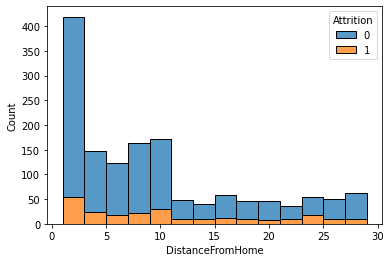

In [26]:
sns.histplot(df, x="DistanceFromHome", hue="Attrition", multiple="stack")

In [27]:
# Combine levels in a categorical variable by seeing their distribution
JobRoleCrossTab = pd.crosstab(df['Education'], df['Attrition'], margins=True)
JobRoleCrossTab

Attrition,0,1,All
Education,,,
1,139,31,170
2,238,44,282
3,473,99,572
4,340,58,398
5,43,5,48
All,1233,237,1470


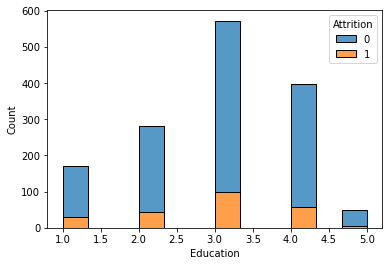

In [30]:
sns.histplot(df, x="Education", hue="Attrition", multiple="stack")

In [29]:
# Combine levels in a categorical variable by seeing their distribution
JobRoleCrossTab = pd.crosstab(df['MonthlyIncome'], df['Attrition'], margins=True)
JobRoleCrossTab

Attrition,0,1,All
MonthlyIncome,,,
1009,0,1,1
1051,1,0,1
1052,1,0,1
1081,0,1,1
1091,0,1,1
...,...,...,...
19926,1,0,1
19943,1,0,1
19973,1,0,1


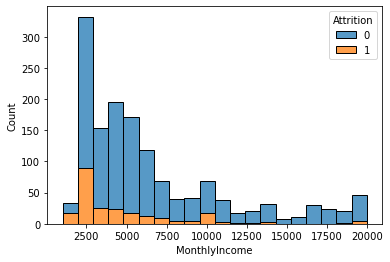

In [28]:
sns.histplot(df, x="MonthlyIncome", hue="Attrition", multiple="stack")